In [56]:
import pandas as pd
import numpy as np
import scipy.optimize as sco
import matplotlib.pyplot as plt

In [57]:
prices=pd.read_excel('./道琼斯工业平均指数成分股2015年至2019年9月的日收盘价.xlsx',header=0,index_col=0)

In [58]:
returns=np.log(prices/prices.shift(1))
returns=returns.dropna()

In [59]:
returns_15to17=returns.loc['2015-01-01':'2017-12-31']

In [60]:
returns_mean=returns_15to17.mean()*252

In [61]:
print('股票 2015 年至 2017 年的年化平均收益率\n',returns_mean.round(6))

股票 2015 年至 2017 年的年化平均收益率
 美国运通        0.021868
波音          0.273898
卡特彼勒        0.180294
雪佛龙         0.035483
迪士尼         0.045772
高盛          0.090357
家得宝         0.202420
IBM        -0.018311
强生          0.097011
摩根大通        0.179562
可口可乐        0.028419
麦当劳         0.204809
3M          0.120628
默克制药       -0.005420
耐克         -0.139779
辉瑞          0.048473
宝洁          0.005280
旅行者保险       0.084177
联合健康        0.261618
联合技术        0.034553
Visa       -0.281890
威瑞森通信       0.039997
沃尔玛         0.046592
埃克森美孚      -0.034842
苹果          0.146016
思科          0.109380
英特尔         0.079759
微软          0.201853
沃尔格林长靴联盟   -0.015205
dtype: float64


In [62]:
vol=returns_15to17.std()*np.sqrt(252)
returns_cov=returns_15to17.cov()*np.sqrt(252)

In [63]:
def F(w): 
    Rf=0.0169428
    w=np.array(w)
    Rp=np.sum(w*returns_mean) 
    Vp=np.sqrt(np.dot(w,np.dot(returns_cov,w.T))) 
    SR=(Rp-Rf)/Vp
    return np.array([Rp,Vp,SR])

In [64]:
def SRmin_F(w): 
    return -F(w)[2]

In [65]:
cons=({'type':'eq','fun':lambda x: np.sum(x)-1})
bnds=tuple((0,1) for x in range(len(returns_mean)))
w0=np.ones_like(returns_mean)/len(returns_mean)

In [66]:
result=sco.minimize(SRmin_F,w0,method='SLSQP',bounds=bnds,constraints=cons)

In [67]:
weight=result['x']
stock_name=returns_mean.index

In [68]:
for i in range(len(returns_mean)):
    print(stock_name[i],round(weight[i],6))

美国运通 0.0
波音 0.246704
卡特彼勒 0.0
雪佛龙 0.0
迪士尼 0.0
高盛 0.0
家得宝 0.109526
IBM 0.0
强生 0.0
摩根大通 0.0
可口可乐 0.0
麦当劳 0.345796
3M 0.0
默克制药 0.0
耐克 0.0
辉瑞 0.0
宝洁 0.0
旅行者保险 0.0
联合健康 0.297974
联合技术 0.0
Visa 0.0
威瑞森通信 0.0
沃尔玛 0.0
埃克森美孚 0.0
苹果 0.0
思科 0.0
英特尔 0.0
微软 0.0
沃尔格林长靴联盟 0.0


In [69]:
Index_18to19=pd.read_excel('./2018年至2019年9月道琼斯工业平均指数的日收盘价.xlsx',sheet_name="Sheet1",header=0,index_col=0)

In [70]:
Index_18to19=100*(Index_18to19/Index_18to19.iloc[0])

In [71]:
prices_18to19=prices.loc['2018-01-01':'2019-09-30']

In [72]:
port_price_18to19=100*np.sum(weight*prices_18to19/prices_18to19.iloc[0],axis=1)

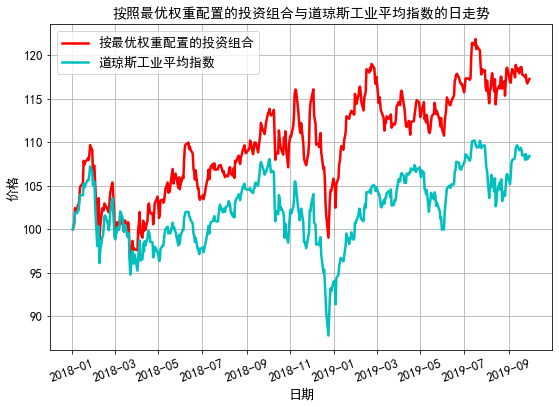

In [73]:
plt.figure(figsize=(9,6))
plt.plot(port_price_18to19,'r-',label=u'按最优权重配置的投资组合',lw=2.5)
plt.plot(Index_18to19,'c-',label=u'道琼斯工业平均指数',lw=2.5)
plt.xlabel(u'日期',fontsize=13)
plt.xticks(fontsize=13,rotation=20)
plt.ylabel(u'价格',fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'按照最优权重配置的投资组合与道琼斯工业平均指数的日走势', fontsize=14)
plt.legend(fontsize=13)
plt.grid('True')
plt.show()